# Pandas & Matplotlib Harder Exercises

This notebook contains 20 exercises (10 Pandas + 10 Matplotlib) using `employees.csv` dataset.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

## Pandas Exercises

### Exercise 1: Load `employees.csv` into a DataFrame and display its shape.

In [14]:
df = pd.read_csv('employees.csv')

### Exercise 2: Use statistical functions to explore the data provided

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    10 non-null     object 
 1   Age     9 non-null      float64
 2   City    10 non-null     object 
 3   Salary  7 non-null      float64
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes


In [16]:
df.describe()

,Age,Salary
count,9.000000,7.000000
mean,31.000000,6014.285714
std,4.769696,893.361762
min,25.000000,5000.000000
25%,28.000000,5300.000000
50%,30.000000,6000.000000
75%,34.000000,6600.000000
max,40.000000,7300.000000


In [17]:
df.head()

,Name,Age,City,Salary
0,Alice,25.0,Riyadh,5000.0
1,Bob,30.0,Jeddah,6000.0
2,Charlie,35.0,Dammam,7000.0
3,Diana,40.0,Riyadh,NaN
4,Evan,28.0,Mecca,5500.0


Hint: notice something wrong? :)

### Exercise 3: Fix the problem with the data

In [20]:
df = df.dropna() # You can fill them as well, i chose not to

### Exercise 4: Show only the rows where `City` is 'Riyadh' and `Salary` > 6000.

In [21]:
df[(df['City'] == 'Riyadh') & (df['Salary'] > 6000)]

,Name,Age,City,Salary
9,Jane,34.0,Riyadh,7300.0


### Exercise 5: Find the average `Salary` for each `City`.

In [22]:
df.groupby('City')['Salary'].mean()

,Salary
City,
Dammam,6050.0
Jeddah,6100.0
Mecca,5500.0
Riyadh,6150.0


### Exercise 6: Add a new column `Salary_USD` converting Salary assuming 1 SAR = 0.27 USD.

In [24]:
df['Salary_USD'] = df['Salary'] * 0.27
df

/tmp/ipython-input-2585092439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary_USD'] = df['Salary'] * 0.27


,Name,Age,City,Salary,Salary_USD
0,Alice,25.0,Riyadh,5000.0,1350.0
1,Bob,30.0,Jeddah,6000.0,1620.0
2,Charlie,35.0,Dammam,7000.0,1890.0
4,Evan,28.0,Mecca,5500.0,1485.0
5,Fay,32.0,Jeddah,6200.0,1674.0
7,Hannah,26.0,Dammam,5100.0,1377.0
9,Jane,34.0,Riyadh,7300.0,1971.0


### Exercise 7: Find the top 3 highest salaries and the corresponding names.

In [25]:
df.nlargest(3, 'Salary')

,Name,Age,City,Salary,Salary_USD
9,Jane,34.0,Riyadh,7300.0,1971.0
2,Charlie,35.0,Dammam,7000.0,1890.0
5,Fay,32.0,Jeddah,6200.0,1674.0


### Exercise 8: Replace all cities named 'Mecca' with 'Makkah'.

In [26]:
df['City'] = df['City'].replace('Mecca', 'Makkah')
df

/tmp/ipython-input-393864575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'] = df['City'].replace('Mecca', 'Makkah')


,Name,Age,City,Salary,Salary_USD
0,Alice,25.0,Riyadh,5000.0,1350.0
1,Bob,30.0,Jeddah,6000.0,1620.0
2,Charlie,35.0,Dammam,7000.0,1890.0
4,Evan,28.0,Makkah,5500.0,1485.0
5,Fay,32.0,Jeddah,6200.0,1674.0
7,Hannah,26.0,Dammam,5100.0,1377.0
9,Jane,34.0,Riyadh,7300.0,1971.0


### Exercise 9: Count how many employees are older than 30 in each city.

In [27]:
df[df['Age'] > 30].groupby('City').count()

,Name,Age,Salary,Salary_USD
City,,,,
Dammam,1,1,1,1
Jeddah,1,1,1,1
Riyadh,1,1,1,1


### Exercise 10: Create a pivot table with `City` as rows and average `Salary` as values.

In [28]:
pd.pivot_table(df, index='City', values='Salary', aggfunc='mean')

,Salary
City,
Dammam,6050.0
Jeddah,6100.0
Makkah,5500.0
Riyadh,6150.0


### Exercise 11: Sort employees by `Age` ascending, then by `Salary` descending.

In [29]:
sorted_df = df.sort_values(by=['Age', 'Salary'], ascending=[True, False])
sorted_df

,Name,Age,City,Salary,Salary_USD
0,Alice,25.0,Riyadh,5000.0,1350.0
7,Hannah,26.0,Dammam,5100.0,1377.0
4,Evan,28.0,Makkah,5500.0,1485.0
1,Bob,30.0,Jeddah,6000.0,1620.0
5,Fay,32.0,Jeddah,6200.0,1674.0
9,Jane,34.0,Riyadh,7300.0,1971.0
2,Charlie,35.0,Dammam,7000.0,1890.0


### Exercise 12: Export only the columns `Name` and `Salary` to a new CSV file named `salaries.csv`.

In [30]:
df[['Name', 'Salary']].to_csv('salaries.csv', index=False)

## Matplotlib Exercises

### Exercise 1: Plot a line graph showing `Age` on X-axis and `Salary` on Y-axis from `employees.csv`.

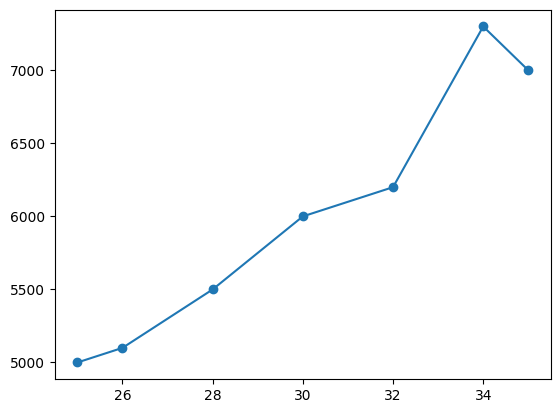

In [12]:
df_sorted = df.sort_values(by='Age')
plt.plot(df_sorted['Age'], df_sorted['Salary'], marker="o")
plt.show()

### Exercise 2: Create a bar chart of average salaries per city.

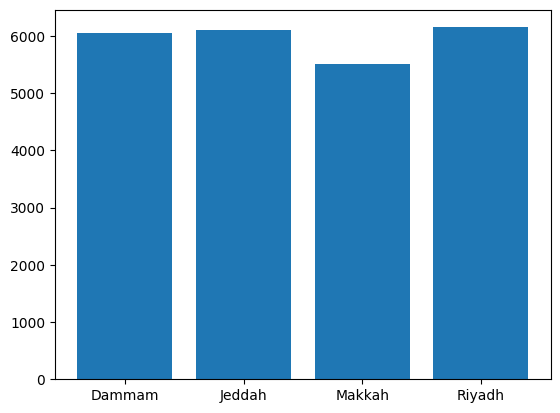

In [31]:
bar_df = df.groupby('City')['Salary'].mean()
plt.bar(bar_df.index, bar_df.values)
plt.show()

### Exercise 3: Create a scatter plot of `Age` vs `Salary`, color points by `City`.

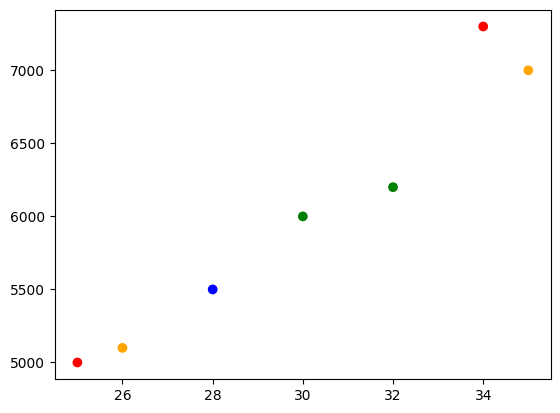

In [35]:
scatter_df = df.sort_values(by='Age')
colors = {'Riyadh': 'red', 'Makkah': 'blue', 'Jeddah': 'green', "Dammam": "orange"}
plt.scatter(scatter_df['Age'], scatter_df['Salary'], c=scatter_df['City'].map(colors))
plt.show()

### Exercise 4: Create a histogram of the `Salary` column with 5 bins.

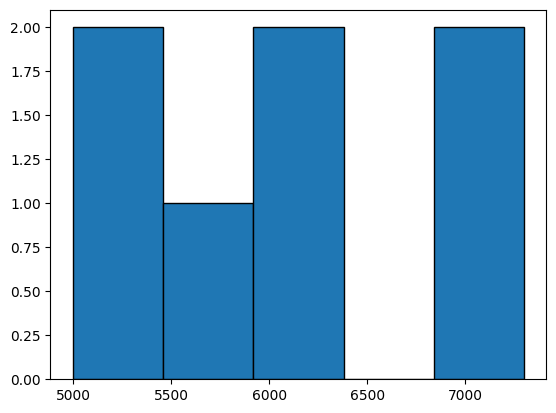

In [37]:
hist_df = df['Salary']
plt.hist(hist_df, bins=5, edgecolor='black')
plt.show()

### Exercise 5: Add title 'Salary Distribution by City' and X/Y axis labels to a bar chart.

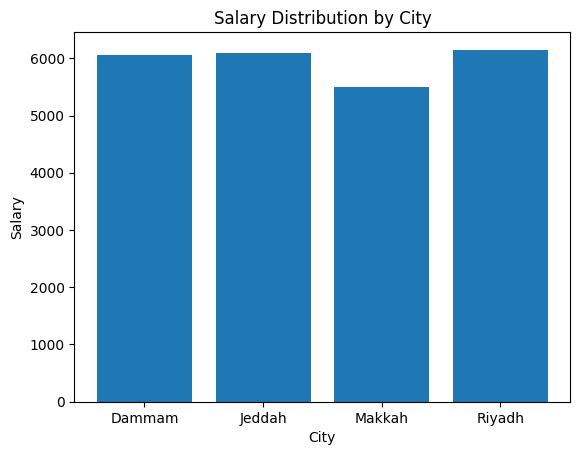

In [39]:
title = 'Salary Distribution by City'
x_label = 'City'
y_label = 'Salary'
plt.bar(bar_df.index, bar_df.values)
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

### Exercise 6: Plot two lines: one for `Age` and another for `Salary` on the same chart.

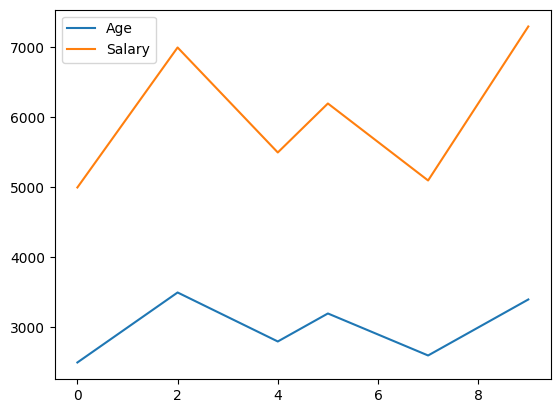

In [43]:
line_1 = df['Age'] * 100 # Here we scaled the age so it can appear with the salary, since their values are too apart
line_2 = df['Salary']
plt.plot(line_1, label='Age')
plt.plot(line_2, label='Salary')
plt.legend()
plt.show()

### Exercise 7: Create a pie chart showing the proportion of employees in each city.

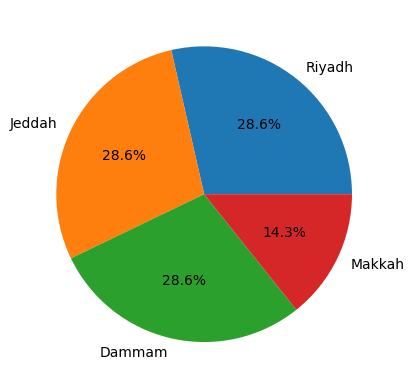

In [44]:
pie_df = df['City'].value_counts()
plt.pie(pie_df.values, labels=pie_df.index, autopct='%1.1f%%')
plt.show()

### Exercise 8: Customize a scatter plot: make points red and size = Age * 10.

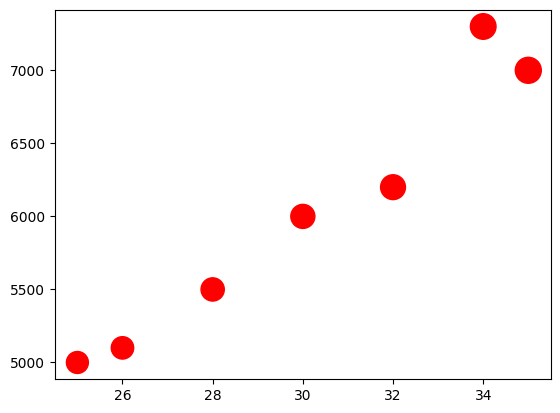

In [45]:
scatter_df = df.sort_values(by='Age')
plt.scatter(scatter_df['Age'], scatter_df['Salary'], c='red', s=scatter_df['Age'] * 10)
plt.show()

### Exercise 9: Create a stacked bar chart showing count of employees grouped by City and Age > 30 vs <= 30.

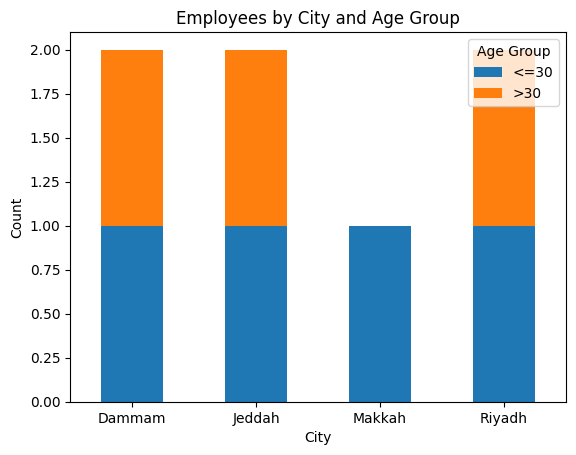

In [51]:
df['AgeGroup'] = df['Age'].apply(lambda x: '>30' if x > 30 else '<=30')

grouped = df.groupby(['City', 'AgeGroup']).size().unstack(fill_value=0)

grouped.plot(kind='bar', stacked=True)

plt.title('Employees by City and Age Group')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.xticks(rotation=0)
plt.show()

### Exercise 10: Save a plot as `analysis.png`.

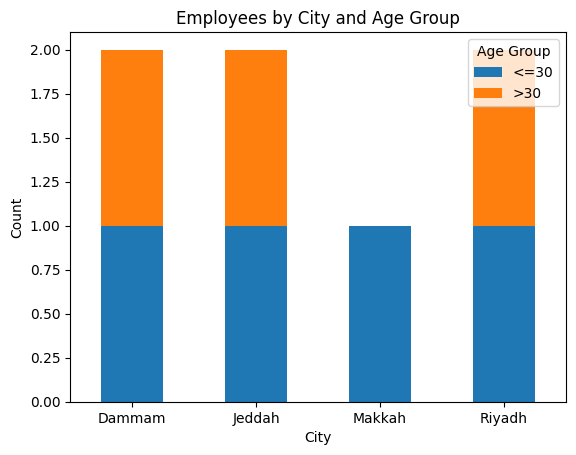

In [52]:
# You can save any plot, i chose the one above
df['AgeGroup'] = df['Age'].apply(lambda x: '>30' if x > 30 else '<=30')

grouped = df.groupby(['City', 'AgeGroup']).size().unstack(fill_value=0)

grouped.plot(kind='bar', stacked=True)

plt.title('Employees by City and Age Group')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.xticks(rotation=0)
plt.savefig('analysis.png')